#### A step by step explanation of Principal Component Analysis (PCA)

The purpose of this post is to provide a complete and simplified explanation of Principal Component Analysis, and to break it down into each of its steps so that everyone can understand it and make use of it, without necessarily having a strong mathematical background. PCA is a widely covered method on the web, and there are some great articles about it, but only a few of them go straight to the point and explain how it works without diving too much into the technicalities and the "why" of things. That's the reason why I decided to make my own post to present it in a simplified way. Before getting into the explanation, this post provides logical explanations of what PCA is doing in each step and simplifies the mathematical concepts behind it, as (1) standardization, (2) covariance, (3) eigenvectors and eigenvalues without focusing on how to compute them.

#### So what is PCA?

PCA is a dimensionality-reduction method that is often used to reduce the diminsionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set. Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for a lot of simplicity. Because smaller data sets are easier to explore and visualize it makes analyzing data much easier and faster for machine learning algorithms without extraneous variable to process. To sum up, the idea of PCA is simple -- reduce the number of variables of a data set, while preserving as much relevant information as possible.

## Step by step explanation

#### Step 1: Standardization

The aim of this step is to standardize the range of the continuous initial variables so that each one of them contributes equally to analysis. More specifically, the reason why it is critical to performa standardization prior to PCA is that the latter is quite sensitive to the variance in the initial variables. That is, if there are large variables (think incomes) and small variables (think ages), then the variables with wider ranges will dominate over the ones with small ranges. This will lead to biased results. Transforming the data to comparable scales prevents this issue. Mathematically this can be accomplished by subtracting the mean and dividing by the standard deviation for each value of each variable. Once the standardizing is done, all the variables will be transformed to the same scale.

#### Step 2: Covariance Matrix Computation

The aim of this step is to understand how the variables of the input data set vary from the mean with respect to each other, or in other words, to see if there is any relationship between them. Because sometimes, variables are highly correlated in such a way that they contain redundant information. So, in order to identify these correlations, we compute the covariance matrix. The covariance matrix is a _p x p_ symmetric matrix (where _p_ is the number of dimensions) that has as entries the covariances associated with all the possible pairs of the initial variables. Since the covariance of a variable with itself is its variance _(Cov(a,a) = Var(a))_, in the main diagonal we will have the variances of each initial variable. And since the covariance is commutative _(Cov(a,b) = Cov(b,a)),_ the entries of the covariance matrix are symmetric with respect to the main diagonal, which means that the upper and lower triangular portions are equal.

##### What do the covariances that we have as entries of the matrix tell us abou thte correlations between the variables?

It's actually the sign of the covariance that matters:

    (1) if positive then: the two variables increase or decrease together (correlated)
    
    (2) if negative then: one increases while the other decreases (inversely correlated)
    
Now that we know that the covariance matrix is nothing more than a table that summarizes the correlations between all the possible pairs of variables, let's move to the next step.

#### Step 3: Compute the eigenvectors and eigenvalues of the covariance matrix to identify the principal components

Eigenvectors and eigenvalues are the linear algebra concepts that we need to compute from the covariance matrix in order to determine the _*principal components*_ of the data. Before getting to the explanation of these concepts, let's first understand what we mean by principal components. Principal components are new variables that are constructed as linear combinations or mixtures of the initial variables. These combinations are done in such a way that the new variables (i.e. principal components) are uncorrelated and most of the information within the initial varaibles is squeezed or compressed into the first components. So, the idea is 10-dimensional data gives you 10 principal components, but PCA tries to put maximum possible information in the first component, then maximum remaining information in the second and so on, until having something like shown in the scree plot below:

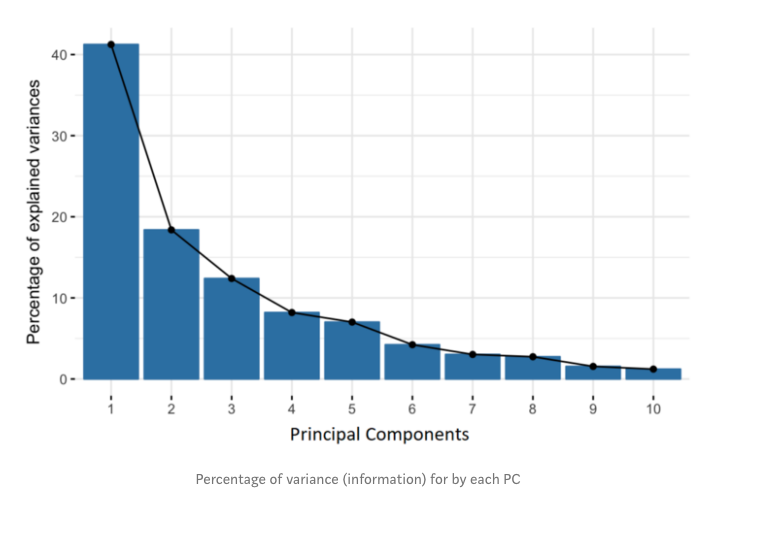

Organizing information in principal components this way will allow you to reduce dimensionality without losing much information, and thus by discarding the components with low information and considering the remaining components as your new variables. An important thing to realize here is that the principals components are less interpretable and don't have any real meaning since they are constructed as linear combinations of the initial varaibles. Geometrically speaking, principal components represent the directions of the data that explain a _maximal amount of variance_, that is, the lines that capture the most information of the data. The relationship between variance and information here is that the larger the variance carried by a line, the larger the dispersion of the data points along it, and the larger the dispersion along a line, the more information it has. To put all this simply, just think of principal componeents as new axes that provide the best angle to see and evaluate the data, so that the differences between the observations are better visible. 

#### How does PCA construct the principal components?

As there are as many principal components as there are variables in the data, principal components are constructed in such a manner that the first principal component accounts for the largest possible variance in the data set. For example, let's assume that the scatter plot of our data set is as shown below, can we guess the first principal component? Yes, it's approximately the line that matches the purple marks because it goes through the origin and it's the line in which the projection of the points (red dots) is the most spread out. Or mathematically speaking, it's th eline that maximizes the variance (the average of the squared distances from the projected points (red dots) to the origin). 

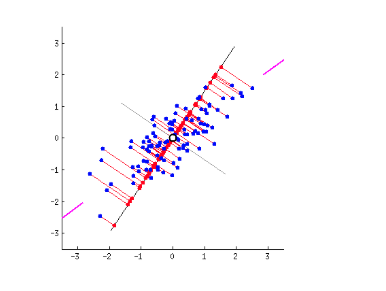

The second principal component is calculated the same way, with the condition that it is uncorrelated with (i.e. perpendicular to) the first principal component and that it accounts for the next highest variance. This continues until a total of p principal components have been calculated, equal to the number of original variables. Now that we understand what we mean by principal components, let's go back to eigenvectors and eigenvalues. What you firstly need to know about them is that they always come in pairs, so that every eigenvector has an eigenvalue. And their number is equal to the number of dimensions of the data. For example, for a 3-dimensional data set, there are 3 variables, therefore there are 3 eigenvectors with 3 corresponding eigenvalues. Without further ado, it is eigenvectors and eigenvalues who are behind all the magic explained above, because the eigenvectors of the Covariance matrix are actually _the directions of the axes where there is the most variance_ (most information) and that we call principal components. And eigenvalues are simply the coefficients attached to eigenvectors, which give the _amount of variance carried in each Principal Component_. By ranking your eigenvectors in order of their eigenvalues, highest to lowest, you get the principal components in order of significance.